In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

In [5]:
# Create SQLalchemy engine
engine = create_engine("sqlite:///hawaii.sqlite")
# Create base class for automap scheda
Base = automap_base()

In [6]:
# Create base class for automap scheda
Base = automap_base()

In [7]:
# reflect an existing database into a new model

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references (variables) to each table (class)
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

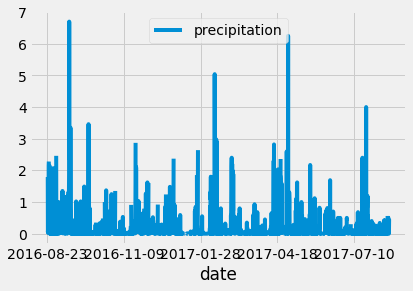

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
#print(df.to_string(index=False)) # Print DF
#print(df.to_string(index=False)) # Print DF w/o inded

# Sort the dataframe by date
df = df.sort_index()
#print(df.to_string(index=False))

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [12]:
results2 = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).filter(Measurement.date >= prev_year).all()
df2 = pd.DataFrame(results2, columns=['date','precipitation','temp'])
df2.describe()

,precipitation,temp
count,2021.000000,2230.000000
mean,0.177279,74.590583
std,0.461190,4.611667
min,0.000000,58.000000
25%,0.000000,72.000000
50%,0.020000,75.000000
75%,0.130000,78.000000
max,6.700000,87.000000


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [15]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4a4e8c950>]],
      dtype=object)

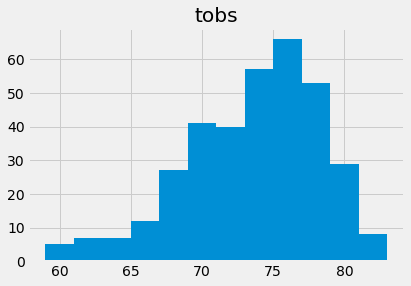

In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)
stationDF = pd.DataFrame(results, columns=['tobs'])
#print(stationDF)
stationDF.hist(bins=12)
#stationDF.hist(bins=5)
#stationDF.hist(bins=20)

In [18]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge

In [19]:
# Determine key statistical data about the month of June.
# Query June Data
june_data = session.query(Measurement.prcp, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

# Convert to Pandas DataFrame
juneDF = pd.DataFrame(june_data, columns=['precipitation','temperature'])

# Use Pandas to calcualte the summary statistics for the temp data
juneDF.describe()


,precipitation,temperature
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


In [20]:
# Determine key statistical data about the month of June.
# Query December Data
dec_data = session.query(Measurement.prcp, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

# Convert to Pandas DataFrame
decDF = pd.DataFrame(dec_data, columns=['precipitation','temperature'])

# Use Pandas to calcualte the summary statistics for the temp data
decDF.describe()



,precipitation,temperature
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000


## Analysis and Recommendations
### Analysis of seasonal data
Between June and December, the analysis as prescribed would have the casual observer believe that breezy, beautiful O‘ahu sees relatively little variation and in precipitation. The descriptive data for the average temperatures works out better than for precipiation so this analysis will start there. The month of December has a warm 71 degrees (rounded to the nearest degree as is standard when talking about weather trends in imperial units), which equivalent, when rounded, to the median temperature, 71. June's average temperature rounds to 75 degrees which, again, is equivalent to the median temperature. Such a small variance would likely mean that the variation in temperature would impact neither ice cream nor surf gear sales. Maximum temperatures see very little variation, with 83 being the maxium in December and 85 as the maximum in June. There is more variation in the minimum side, with temperatures in December reaching a frigid 56 degrees while June dips to only 64 degrees. 

As for precipitation, the most valuabel information to be taken from the precipitation statistics is that the lower quartile for both months is a zero value, meaning at least a quarter of the day-site measurments see no rain and the median for both, December being 0.03" and June being 0.05", indicate very little rain. Effectively, half the days in each month see little to no rain. The mean differes somewhat significantly, with the average measurment in December being 0.22" in December and. 0.14" in June. Obviously, December is during the wet season, which is also reflected in the astonishinly high measurement of 6.42" of rain in a day (though 4.43", the maximum in June, is nothing to sneeze at). These high measurements, probably from a station on the windward side of the island, wreak havok on the data, leading to standard deviations that are higher than their respective average measurements. All-in-all, central tendencies such as these are not a great way to classify precipitation data.

### Recommendations for further analysis:
While aggregating the data may be a convenient way to get an idea for the general trends, the requested analysis does not provide meaningful information as it would relate to the location and operation of the surf/ice cream shop. The ovearching critique is that this particular look is too coarse while the data is so fine that much more applicable information may be extracted.

The first deeper analysis propsed would be to get away from generalizing by months. Quartiles do not describe rain chances very well and it would be more useful to consider both the chance of rain on a given day  and the amount. The chance would be determined by ratio of the number of times rain has occurred on a specific date at all sites and all years to the total number of observations on that date, perhaps using a rolling 3- or 7-day average. This information could be paired with the average amount of rain seen at the nearest 1 or 3 sites.

A second analysis builds on the previous. The 8 sites appear to have relatively different weather patterns. A meteorlogical site in the mountains, which will be cooler and typically wetter, do not provide information that will be particularly useful for a coastal shop. A histogram of daily average temperatures for the nearby sites will be more informative in making business decisions. Supplementing that, daily average rain, overlaid on chance of rain as described above, will be, provide better data.

Finally, W. Avy is, simply put, wrong about the months he chose to analyze in depth. First, it would be important to consider the months with the highest and lowest average temperatures, the months with the highest and lowest amounts of rain, and the months with the highest and lowests days with rain in order to get an idea of what months to analyze. Following that, W. Avy should consult a surf report to determin the months with the best surf and economic data in decipher which months have the most visitors. A more comprehensive look will help W. Avy to understand not just if weather could impact business, but if the impact will come at high or lows seasons, economically speaking.